In [51]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np 

## Waveform

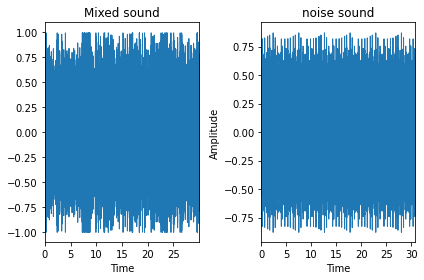

In [52]:
file_mixed = "pepe.wav"
noise = "noise_1.wav"

fig, (ax1,ax2) =plt.subplots(1,2)
#waveform
signal_mixed, sr = librosa.load(file_mixed,sr=16000) #signal = 1D-Array of 16000 * 30 values, being 30 secs of record
librosa.display.waveplot(signal_mixed, sr=sr, ax=ax1)
ax1.set_title("Mixed sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#noise
signal_noise, sr = librosa.load(noise,sr=16000) #signal = 1D-Array of 16000 * 30 values, being 30 secs of record
librosa.display.waveplot(signal_noise, sr=sr, ax=ax2)
ax2.set_title("noise sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")

fig.tight_layout()

plt.show()


## FFT

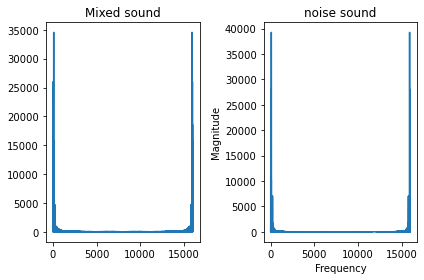

In [53]:
fig, (ax1,ax2) =plt.subplots(1,2)
fft_mixed = np.fft.fft(signal_mixed)

## Conseguimos las magnitudes de los valores de la señal
# estas magnitudes son la contribucioón de cada valor sobre todo el sonido
magnitude_mixed = np.abs(fft_mixed)

## buscaremos el un valor igual de datos distribuidos en un intervalo, en este caso nuestro sampleRate 
#lo buscamos entre 0 y sr y el numero de datos distribuidos será la longitud de nuestra magnitud
frequency_mixed= np.linspace(0,sr, len(magnitude_mixed))

## Plot
ax1.plot(frequency_mixed,magnitude_mixed)
ax1.set_title("Mixed sound")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

## Noise

fft_noise = np.fft.fft(signal_noise)

## Conseguimos las magnitudes de los valores de la señal
# estas magnitudes son la contribucioón de cada valor sobre todo el sonido
magnitude_noise = np.abs(fft_noise)

## buscaremos el un valor igual de datos distribuidos en un intervalo, en este caso nuestro sampleRate 
#lo buscamos entre 0 y sr y el numero de datos distribuidos será la longitud de nuestra magnitud
frequency_noise= np.linspace(0,sr, len(magnitude_noise))

## Plot
ax2.plot(frequency_noise,magnitude_noise)
ax2.set_title("noise sound")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

fig.tight_layout()

plt.show()

Como podemos ver, la grafica es simétrica y es debido a las propiedades de la FFT, por tanto solo necesitaremos la primera parte

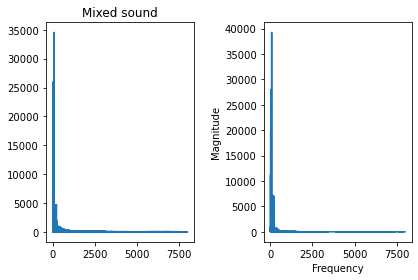

In [54]:
fig, (ax1,ax2) =plt.subplots(1,2)

left_frequency_mixed= frequency_mixed[:int(len(frequency_mixed)/2)]
left_magnitude_mixed= magnitude_mixed[:int(len(frequency_mixed)/2)]

## Plot mixed
ax1.plot(left_frequency_mixed,left_magnitude_mixed)
ax1.set_title("Mixed sound")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

## Noise

left_frequency_noise= frequency_noise[:int(len(frequency_noise)/2)]
left_magnitude_noise= magnitude_noise[:int(len(magnitude_noise)/2)]

## Plot mixed
ax2.plot(left_frequency_noise,left_magnitude_noise)
ax1.set_title("Mixed sound")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


fig.tight_layout()

plt.show()

## STFT y Espectrograma

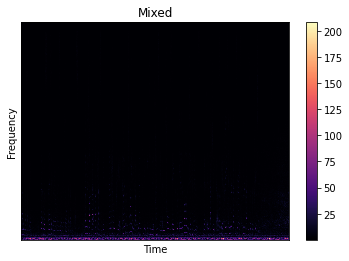

In [55]:
#numero de datos por FFT es la ventana que le ponemos cuando hacemos una FFT simple
n_fft = 2080 
#Hop lenght es lo que coges de la anterior FFT para que haya continuidad con el siguiente 
hop_length = 512

stft_mixed= librosa.core.stft(signal_mixed,hop_length=hop_length,n_fft=n_fft)

##Consegukmos las magnitudes
spectrogram_mixed = np.abs(stft_mixed)

#Plot
librosa.display.specshow(spectrogram_mixed, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Mixed")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

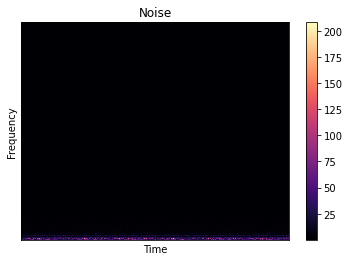

In [56]:
#numero de datos por FFT es la ventana que le ponemos cuando hacemos una FFT simple
n_fft = 2080 
#Hop lenght es lo que coges de la anterior FFT para que haya continuidad con el siguiente 
hop_length = 512

stft_noise= librosa.core.stft(signal_noise,hop_length=hop_length,n_fft=n_fft)

##Consegukmos las magnitudes
spectrogram_noise = np.abs(stft_noise)

#Plot
librosa.display.specshow(spectrogram_noise, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Como podemos observar al estar linealmente expresadas las frecuencias, cuesta mucho diferenciarlas, asi que calcularemos el spectrograma basado en logaritmos

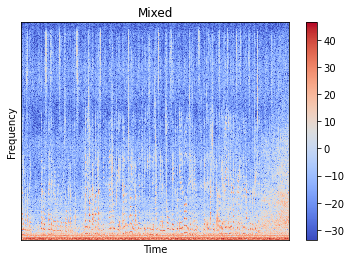

In [57]:
log_spectrogram_mixed= librosa.amplitude_to_db(spectrogram_mixed)#Convertimos a db

librosa.display.specshow(log_spectrogram_mixed, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Mixed")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

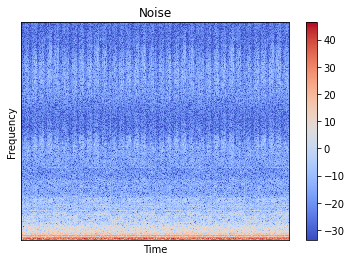

In [58]:
log_spectrogram_noise= librosa.amplitude_to_db(spectrogram_noise)#Convertimos a db

librosa.display.specshow(log_spectrogram_noise, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

## MFCCs

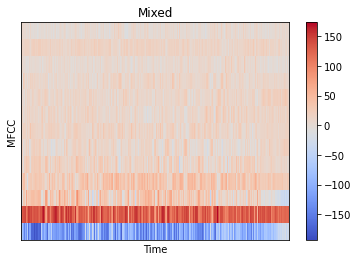

In [63]:
MFFCs_mixed= librosa.feature.mfcc(signal_mixed, n_fft=n_fft, hop_length= hop_length, n_mfcc=13)
librosa.display.specshow(MFFCs_mixed, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Mixed")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

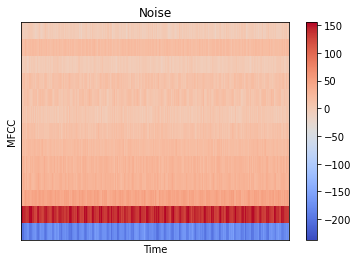

In [64]:
MFFCs_noise= librosa.feature.mfcc(signal_noise, n_fft=n_fft, hop_length= hop_length, n_mfcc=13)
librosa.display.specshow(MFFCs_noise, sr=sr, hop_length=hop_length)## Nos permite visualizar como un mapa de calor
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [3]:
import ijson
import numpy as np
with open("pepe.json", "r") as f:
    for record in ijson.items(f,"pepe"):
        inputs_spec= np.array(record)
print(inputs_spec)
# with open("pepe.json", "r") as f:        
#     for record in ijson.items(f,"juan"):
#         print(record)
#         targets_spec= np.array(record)

[[423 324 423 432   5 235 325  35 235 235 235  53]
 [423 324 423 432   5 235 325  35 235 235 235  53]
 [423 324 423 432   5 235 325  35 235 235 235  53]
 [423 324 423 432   5 235 325  35 235 235 235  53]]
